In [1]:
print("Hello World!")

Hello World!


In [2]:
import pandas as pd


In [3]:
import seaborn as sns


In [4]:
# We’ll be using Statsmodels since it has some nice characteristics for linear modeling.
# # https://www.statsmodels.org/stable/index.html 
import statsmodels.formula.api as smf

In [5]:
# I am also using scikit-learn since it provides significantly more useful functionality for machine learning.
# https://scikit-learn.org/stable/
from sklearn.linear_model import LinearRegression


In [6]:
from sklearn import metrics

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import numpy as np

In [9]:
# allow plots to appear directly in the notebook
%matplotlib inline

In [10]:
# read data into a DataFrame
data = pd.read_csv('plant_prod_hourly.csv')
#data = pd.read_csv('advertising.csv')
data.head()

,Production_Hour_x,Production_Volume_y
0,34,102
1,35,109
2,39,137
3,42,148
4,43,150


In [11]:
# print the shape of the DataFrame
data.shape

(6, 2)

There are 6 observations, and thus 2 variables in the dataset.

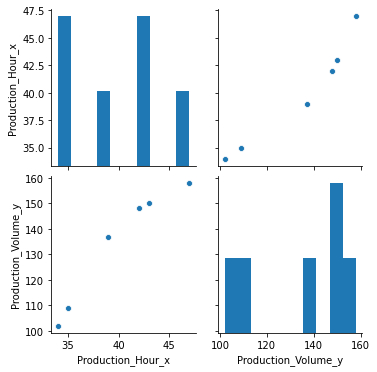

In [12]:
# visualize the relationship between the features and the response using scatterplots
# Create the default pairplot
sns.pairplot(data)

In [13]:
### SCIKIT-LEARN ###
# create X and y
feature_cols = ['Production_Hour_x']
X = data[feature_cols]
y = data.Production_Volume_y
# Initiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)
# print the coefficients
print ("iNTERCEPT : ",lm2.intercept_)
print ("CO-EFFICIENT : ",lm2.coef_)

iNTERCEPT :  -45.99999999999994
CO-EFFICIENT :  [4.5]


We interpret the Production_Hour_x coefficient (β1)?

A “unit” increase in Production_Hour_x is associated with a 4.7016129 “unit” increase in Production_Volume_y.

In [14]:
### STATSMODELS ###
# create a fitted model
lm1 = smf.ols(formula='Production_Volume_y ~ Production_Hour_x', data=data).fit()
# print the coefficients
lm1.params

Intercept           -46.0
Production_Hour_x     4.5
dtype: float64

In [15]:
### STATSMODELS ###
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Production_Hour_x': [125]})
# predict for a new observation
lm1.predict(X_new)

0    516.5
dtype: float64

In [16]:
# 125 hour of productions yelds for 516 volume units
# manually calculate the prediction to confirm the above calculation :)
-45.99999999999994 + 4.5*125

516.5

In [17]:
### SCIKIT-LEARN ###
# predict for a new observation
lm2.predict([[38]])


array([125.])

We would predict Production of 532.80 in that market by working 125 hour.

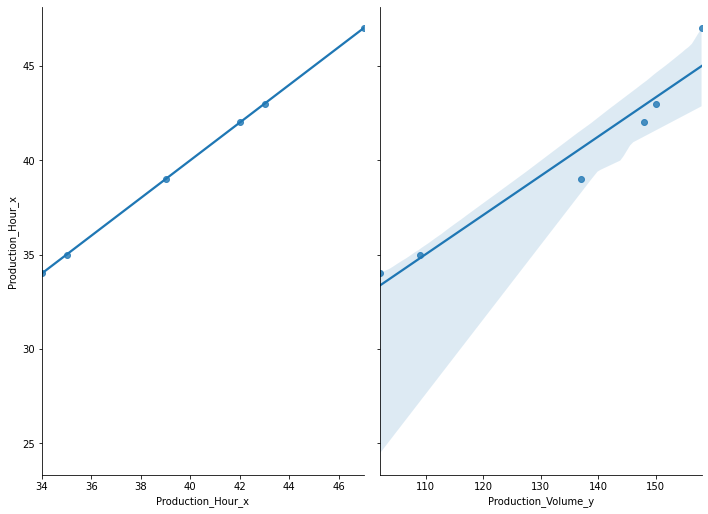

In [18]:
#Plotting the Least Squares Line 
# Let’s plot the least squares line for Production versus Volume
sns.pairplot(data, x_vars=['Production_Hour_x','Production_Volume_y'], y_vars='Production_Hour_x', size=7, aspect=0.7, kind='reg')

In [19]:
### STATSMODELS ###
# print the p-values for the model coefficients
lm1.pvalues

Intercept            0.126734
Production_Hour_x    0.001628
dtype: float64

Hypothesis Testing and p-values

Generally speaking, you start with a null hypothesis and an alternative hypothesis (that is opposite the null). Then, you check whether the data supports rejecting the null hypothesis or failing to reject the null hypothesis.

(Note that “failing to reject” the null is not the same as “accepting” the null hypothesis. The alternative hypothesis may indeed be true, except that you just don’t have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:

null hypothesis: There is no relationship between Production and Plant Operating Hours (and thus β1β1 equals zero)
alternative hypothesis: There is a relationship between Production and Plant Operating Hours (and thus β1β1 is not equal to zero)

A p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response.

In this case, the p-value for Production_Hour_x is far less than 0.05, and so we believe that there is a relationship between  Production and Plant Operating Hours.

we generally don’t consider the p-value for the intercept.

In [20]:
### STATSMODELS ###
# print the R-squared value for the model
print("StatModel R-Square Value",lm1.rsquared)

StatModel R-Square Value 0.9348473566641846


In [21]:
### SCIKIT-LEARN ###
# print the R-squared value for the model
print("SkLearn R-Square Value",lm2.score(X, y))

SkLearn R-Square Value 0.9348473566641846
